In [82]:
# import des librairies requises
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from stop_words import get_stop_words

In [2]:
# lecture des différents csv dans les 3 variables 
#df1 = pd.read_csv("./../data/offers.csv")
df1 = pd.read_csv("./../data/offers_with_10k_each_contracts.csv")

#df2 = pd.read_csv("./../data/organizations.csv")
#df3 = pd.read_csv("./../data/recruiters.csv")

df1
# df2
# df3

,offer_id,title,description,contract_id,recruiter_id,department_id,industry_id,location,latitude,longitude,created_at
0,620861,Développeur(euse) Android expérimenté(e),LE POSTE\r\nNous mettons aujourd’hui en place ...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:37:48.322823
1,620862,Ingénieur QA Mobile,LE POSTE\r\nEn tant qu’Ingénieur Qualité Mobil...,1,17524.0,114.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-06-01 10:45:00.950319
2,330503,Vérificateur Documents Techniques Aéronautique...,Technicien Vérificateur Documents Techniques A...,1,NaN,108.0,15.0,Donauwörth,48.735699,10.791800,2015-03-26 04:16:35.620706
3,623978,Chef de Produit Mobile,L’EQUIPE\r\nL’équipe Produit & Innovation poss...,1,17524.0,115.0,17.0,"5 Rue François 1er, Paris, France",48.865561,2.308744,2017-07-18 14:04:00.652073
4,391895,Ordonnanceur H/F,"Entreprise :\n\nOPTIMA IP, cabinet de recrutem...",1,NaN,117.0,20.0,"Sucy-en-Brie, France",48.770802,2.538860,2015-05-22 10:38:42.117161
5,626090,Consultant stratégie digitale,Vous êtes jeune diplômé(e) d’une grande école ...,1,17549.0,119.0,9.0,"Paris, France",48.856614,2.352222,2017-08-28 08:01:28.911562
6,612987,Ingénieur études et développement C# H/F,Dans le cadre des projets de développement de ...,1,17561.0,101.0,15.0,"Grenoble, France",45.188529,5.724524,2017-01-10 13:37:17.537197
7,358977,RESPONSABLE BUREAU D'ÉTUDES CÂBLAGE ELECTRIQUE...,Entreprise :NOVAJob se veut être le précurseur...,1,NaN,117.0,9.0,"LANGUEDOC ROUSSILL, France",43.593406,3.227784,2015-04-16 08:26:52.143544
8,694642,Responsable Ingénierie QOS,"En 2017, Bouygues Telecom connait une très for...",1,16826.0,107.0,24.0,13 AVENUE DU MARECHAL JUIN 92360 MEUDON,48.786771,2.220587,2018-08-23 09:38:51.919709
9,565156,Sales Representative,NaN,1,12374.0,103.0,9.0,"1343 East Gun Hill Road, Bronx, NY, United States",40.870953,-73.846569,2016-04-07 13:04:23.503985


In [3]:
df_offers = df1[df1.contract_id.notnull()]

In [4]:
# Comptage de nombres d'offres pour chaque type de contrats
df1.contract_id.value_counts()

3    10000
2    10000
1    10000
4     4800
5     3694
Name: contract_id, dtype: int64

In [5]:
# Remplacement des valeurs NA avec ""

df_offers['description'] = [BeautifulSoup(text, "html.parser").get_text() for text in df_offers['description'].fillna("")]

In [6]:
import unidecode

In [7]:
#Définition du préprocessor pour supprimer les digits et transformer le texte en minuscule
def my_preprocessor(text):
    return unidecode.unidecode(''.join([letter for letter in text if not letter.isdigit()]).strip().lower())

In [8]:
# Vectorisation

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer


#stop words fr dans stop_words
stop_wordsFR = get_stop_words('french')

vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    analyzer="word",
    binary=False,
    max_features=6000,
    stop_words = stop_wordsFR,
preprocessor=my_preprocessor)


In [9]:
#tfidf fit de cleaned_description

vectorizer.fit(df_offers.description)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=6000, min_df=1,
        ngram_range=(1, 3), norm='l2',
        preprocessor=<function my_preprocessor at 0x09868FA8>,
        smooth_idf=True,
        stop_words=['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', '...ça', 'étaient', 'étais', 'était', 'étant', 'état', 'étiez', 'étions', 'été', 'étés', 'êtes', 'être'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
X = vectorizer.transform(df_offers.description)
X

<38494x6000 sparse matrix of type '<class 'numpy.float64'>'
	with 4244783 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, df_offers.contract_id, test_size=0.30)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
#Instance d'une régression logistique
clf = LogisticRegression()

In [15]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
clf.predict(X_test)

array([2, 3, 3, ..., 3, 3, 3], dtype=int64)

In [17]:
from collections import Counter

In [18]:
Counter(clf.predict(X_test))

Counter({2: 3184, 3: 3319, 1: 3836, 4: 733, 5: 477})

In [19]:
Counter(y_test)

Counter({2: 2978, 3: 3015, 4: 1431, 1: 3033, 5: 1092})

In [20]:
print("Matrice de confusion : \n", confusion_matrix(y_test, clf.predict(X_test)))

Matrice de confusion : 
 [[2231  519  110  101   72]
 [ 605 2059   91  142   81]
 [  63   40 2880   32    0]
 [ 475  335  169  337  115]
 [ 462  231   69  121  209]]


In [21]:
xArray = X[:10].toarray()

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
#Score de la prédiction
accuracy_score(clf.predict(X_test), y_test)

0.6681097930556759

In [24]:
 print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          1       0.74      0.58      0.65      3836
          2       0.69      0.65      0.67      3184
          3       0.96      0.87      0.91      3319
          4       0.24      0.46      0.31       733
          5       0.19      0.44      0.27       477

avg / total       0.73      0.67      0.69     11549



In [25]:
xArray

array([[0.06200716, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05849331, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19095715],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
pipeline = Pipeline(steps=[
    #('text_extraction', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [29]:
pred = Counter(pipeline.predict(X_test))

In [30]:
pred

Counter({2: 3184, 3: 3319, 1: 3836, 4: 733, 5: 477})

In [33]:
type(clf.predict(X_test))

numpy.ndarray

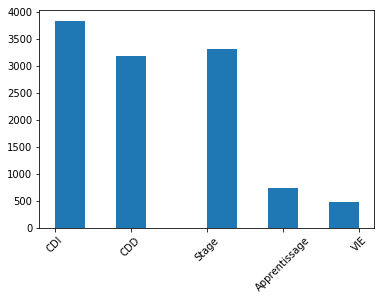

In [61]:
plt.hist(clf.predict(X_test))
#plt.xticks(range(1, 6))
plt.xticks(np.arange(1,6), ('CDI', 'CDD', 'Stage', 'Apprentissage', 'VIE'), rotation=45 )
plt.show()

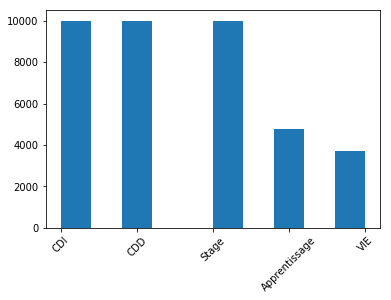

In [81]:
plt.hist(df1.contract_id)
plt.xticks(np.arange(1,6), ('CDI', 'CDD', 'Stage', 'Apprentissage', 'VIE'), rotation=45 )
plt.show()